In [1]:
import os
import sys
import matplotlib.pyplot as plt

sys.path.append('..')

In [2]:
# load file name
train_img_path = '../data/train/original/'
train_label_path = '../data/train/ground_truth/'
test_img_path = '../data/test/original/'
test_label_path = '../data/test/ground_truth/'

train_img_files = os.listdir(train_img_path)
train_label_files = os.listdir(train_label_path)
test_img_files = os.listdir(test_img_path)
test_label_files = os.listdir(test_label_path)

train_img = [os.path.join(train_img_path, file) for file in train_img_files]
train_label = [os.path.join(train_label_path, file) for file in train_label_files]
test_img = [os.path.join(test_img_path, file) for file in test_img_files]
test_label = [os.path.join(test_label_path, file) for file in test_label_files]

print(f'Number of training images: {len(train_img)}')
print(f'Number of training labels: {len(train_label)}')
print(f'Number of testing images: {len(test_img)}')
print(f'Number of testing labels: {len(test_label)}')

Number of training images: 600
Number of training labels: 600
Number of testing images: 200
Number of testing labels: 200


In [3]:
# Utils
from PIL import Image 

def load_img(file_path):
    return Image.open(file_path)

def load_label(file_path):
    # In grayscale (1 canal)
    return Image.open(file_path).convert('L')

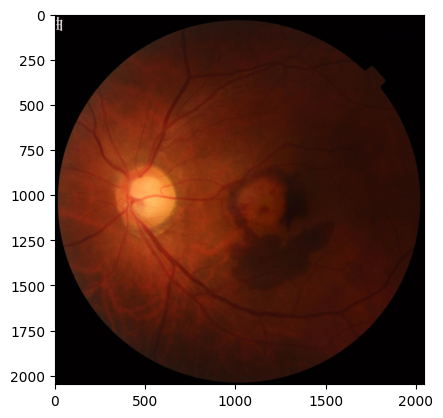

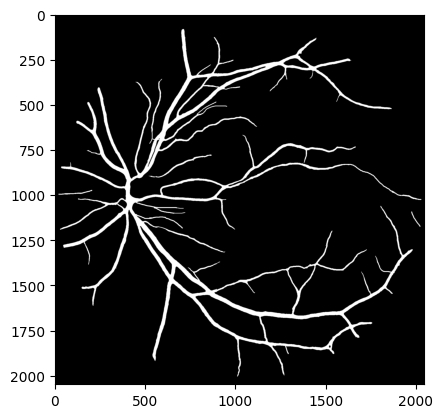

In [4]:
# Une image et son label
num_obs = 0

img = load_img(train_img[num_obs])
plt.imshow(img)
plt.show()

label = load_img(train_label[num_obs])
plt.imshow(label)
plt.show()

In [5]:
import torchvision.transforms as transforms
from src.dataset.dataset import VesselDataset
from torch.utils.data import DataLoader, random_split

batch_size = 8

transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),  # (3, 256, 256)
])

dataset = VesselDataset(train_img, train_label, transform=transform)

train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

test_dataset = VesselDataset(test_img, test_label, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [6]:
from src.models.models import UNet
import torch
import torch.nn as nn

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = UNet(3,1).to(device)

EPOCHS = 5
LR = 0.0001
PATIENCE = 5
epsilon = 0.5
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

if torch.cuda.is_available():
    torch.cuda.empty_cache()

In [7]:
from src.models.train import train

train_losses, val_losses = train(model, train_loader, val_loader, criterion, optimizer, device, EPOCHS, PATIENCE, epsilon)

100%|██████████| 15/15 [00:32<00:00,  2.18s/it]


Epoch 1/5 | Train: 0.4898 | Val: 0.4307


100%|██████████| 15/15 [00:27<00:00,  1.83s/it]


Epoch 2/5 | Train: 0.4048 | Val: 0.3902


100%|██████████| 15/15 [00:26<00:00,  1.75s/it]


Epoch 3/5 | Train: 0.3664 | Val: 0.3453


100%|██████████| 15/15 [00:26<00:00,  1.78s/it]


Epoch 4/5 | Train: 0.3301 | Val: 0.3041


100%|██████████| 15/15 [00:26<00:00,  1.75s/it]

Epoch 5/5 | Train: 0.2995 | Val: 0.2828


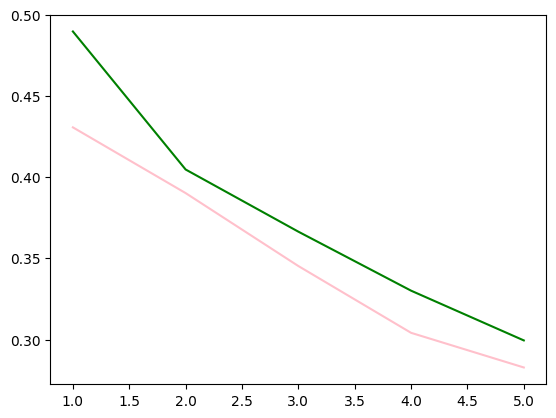

In [8]:
from src.utils.viz import viz_train_and_val_losses

viz_train_and_val_losses(train_losses, val_losses)